# Experimento 5
Código por Ricardo Rocha

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import numpy as np
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Mola Única

In [92]:
# Mola Única

massas_unico = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
pesos_unico = [round(m*9.8, 2) for m in massas_unico]
indexes_unico = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

posicao_inicial_unico = 0.011
posicoes_unico = [0.041, 0.072, 0.101, 0.131, 0.162, 0.189, 0.211, 0.243, 0.274, 0.309]
deslocamentos_unico = [round(p-posicao_inicial_unico, 3) for p in posicoes_unico]

constantes_elasticas_unico = [round(peso_unico/deslocamento_unico, 4) for (peso_unico, deslocamento_unico) in zip(pesos_unico, deslocamentos_unico)]
print(constantes_elasticas_unico)

media_constantes_elasticas_unico = round(statistics.mean(constantes_elasticas_unico), 4)

[16.3333, 16.0656, 16.3333, 16.3333, 16.2252, 16.5169, 17.15, 16.8966, 16.7681, 16.443]


In [116]:
# Incertezas Mola Única

incerteza_unico = round(((((9.8066*0.05) + 0)**2)**0.5), 4)
print(f"Incerteza da força aplicada: {incerteza_unico}")

incerteza_deslocamento_unico = round(incerteza_unico/media_constantes_elasticas_unico, 4)
print(f"Incerteza do deslocamento: {incerteza_deslocamento_unico}")

incerteza_constante_unico = round((incerteza_unico/statistics.mean(pesos_unico)) + (incerteza_deslocamento_unico/statistics.mean(deslocamentos_unico)), 4)
print(f"Incerteza da constante elástica: {incerteza_constante_unico}")

Incerteza da força aplicada: 0.4903
Incerteza do deslocamento: 0.0297
Incerteza da constante elástica: 0.3649


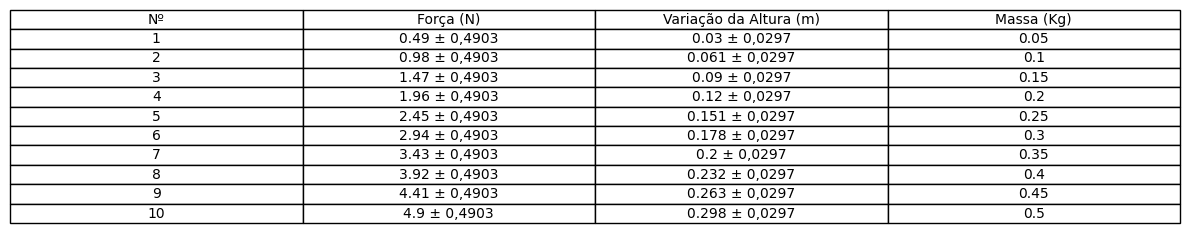

In [105]:
# Tabela Mola Única

pesos_unico_com_incerteza = [f"{f} ± 0,4903" for f in pesos_unico]
deslocamentos_unico_com_incerteza = [f"{p} ± 0,0297" for p in deslocamentos_unico]
data = {
    "Nº": indexes_unico,
    "Força (N)": pesos_unico_com_incerteza,
    "Variação da Altura (m)": deslocamentos_unico_com_incerteza,
    "Massa (Kg)": massas_unico
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.tight_layout()
plt.show()

Erro quadrático médio: 0.0006079889973829969
Intercepto em Y (B): -0.0238
Coeficiente (A): 16.7441
Equação aproximada para a reta: (16.7441)*y + -0.0238


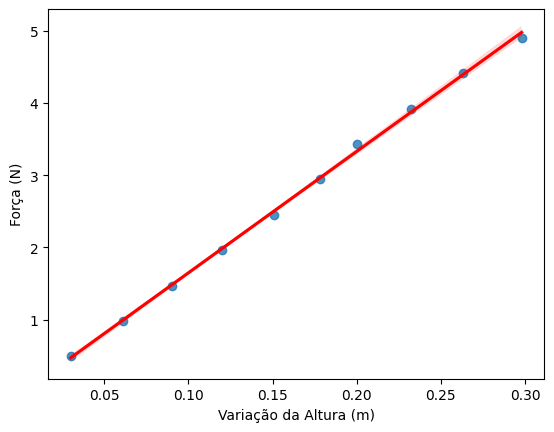

In [38]:
# Gráfico Mola Única

forces_array = np.array(pesos_unico)
heights_array = np.array(deslocamentos_unico)
heights_array = np.array(heights_array).reshape(-1, 1)

heights_train, heights_test, forces_train, forces_test  = train_test_split(heights_array, forces_array, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(heights_train, forces_train)
forces_pred = model.predict(heights_test)
mse = mean_squared_error(forces_test, forces_pred)

coefficient = round(model.coef_[0], 4)
intercept = round(model.intercept_, 4)

print(f"Erro quadrático médio: {mse}")
print(f"Intercepto em Y (B): {intercept}")
print(f"Coeficiente (A): {coefficient}")
print(f"Equação aproximada para a reta: ({coefficient})*y + {intercept}")


sns.regplot(x = heights_array, y = forces_array, line_kws={'color': 'red'})
plt.xlabel('Variação da Altura (m)')
plt.ylabel('Força (N)')
plt.show()

## Molas em Série

In [93]:
# Molas em Série

massas_serie = [0.05, 0.1, 0.15, 0.2]
pesos_serie = [round(m*9.8, 2) for m in massas_serie]
indexes_serie = ['1', '2', '3', '4']

posicao_inicial_serie = 0.125
posicoes_serie = [0.182, 0.237, 0.297, 0.354]
deslocamentos_serie = [round(p-posicao_inicial_serie, 3) for p in posicoes_serie]

constantes_elasticas_serie = [round(peso_serie/deslocamento_serie, 4) for (peso_serie, deslocamento_serie) in zip(pesos_serie, deslocamentos_serie)]
print(constantes_elasticas_serie)

media_constantes_elasticas_serie = round(statistics.mean(constantes_elasticas_serie), 4)

[8.5965, 8.75, 8.5465, 8.559]


In [117]:
# Incertezas Molas em Série

incerteza_serie = round(((((9.8066*0.05) + 0)**2)**0.5), 4)
print(f"Incerteza da força aplicada: {incerteza_serie}")

incerteza_deslocamento_serie = round(incerteza_serie/media_constantes_elasticas_serie, 4)
print(f"Incerteza do deslocamento: {incerteza_deslocamento_serie}")

incerteza_constante_serie = round((incerteza_serie/statistics.mean(pesos_serie)) + (incerteza_deslocamento_serie/statistics.mean(deslocamentos_serie)), 4)
print(f"Incerteza da constante elástica: {incerteza_constante_serie}")

Incerteza da força aplicada: 0.4903
Incerteza do deslocamento: 0.0569
Incerteza da constante elástica: 0.7995


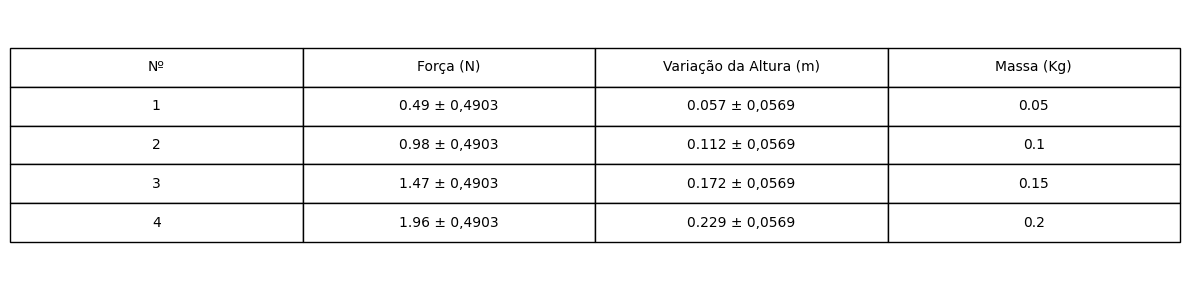

In [108]:
# Tabela Molas em Série

pesos_serie_com_incerteza = [f"{f} ± 0,4903" for f in pesos_serie]
deslocamentos_serie_com_incerteza = [f"{p} ± 0,0569" for p in deslocamentos_serie]
data = {
    "Nº": indexes_serie,
    "Força (N)": pesos_serie_com_incerteza,
    "Variação da Altura (m)": deslocamentos_serie_com_incerteza,
    "Massa (Kg)": massas_serie
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.tight_layout()
plt.show()

Erro quadrático médio: 0.0004303791583249918
Intercepto em Y (B): 0.0024
Coeficiente (A): 8.5429
Equação aproximada para a reta: (8.5429)*y + 0.0024


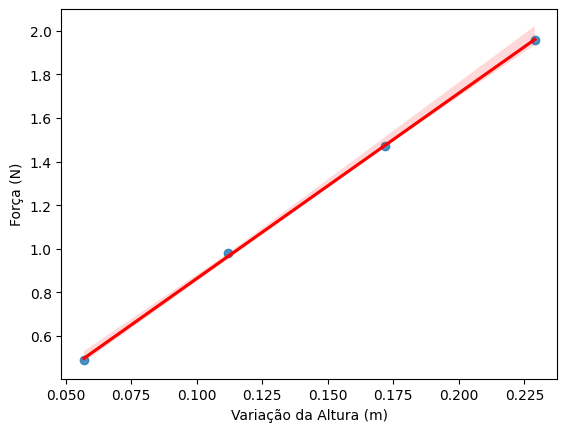

In [56]:
# Gráfico Molas em Série

forces_array = np.array(pesos_serie)
heights_array = np.array(deslocamentos_serie)
heights_array = np.array(heights_array).reshape(-1, 1)

heights_train, heights_test, forces_train, forces_test  = train_test_split(heights_array, forces_array, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(heights_train, forces_train)
forces_pred = model.predict(heights_test)
mse = mean_squared_error(forces_test, forces_pred)

coefficient = round(model.coef_[0], 4)
intercept = round(model.intercept_, 4)

print(f"Erro quadrático médio: {mse}")
print(f"Intercepto em Y (B): {intercept}")
print(f"Coeficiente (A): {coefficient}")
print(f"Equação aproximada para a reta: ({coefficient})*y + {intercept}")


sns.regplot(x = heights_array, y = forces_array, line_kws={'color': 'red'})
plt.xlabel('Variação da Altura (m)')
plt.ylabel('Força (N)')
plt.show()

## Molas em Paralelo

In [94]:
# Molas em paralelo

massas_sequencia = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
pesos_sequencia = [round(m*9.8, 2) for m in massas_sequencia]
indexes_sequencia = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

posicao_inicial_sequencia = 0.000
posicoes_sequencia = [0.013, 0.026, 0.045, 0.057, 0.072, 0.087, 0.100, 0.117, 0.132, 0.146]
deslocamentos_sequencia = [round(p-posicao_inicial_sequencia, 3) for p in posicoes_sequencia]

constantes_elasticas_sequencia = [round(peso_sequencia/deslocamento_sequencia, 4) for (peso_sequencia, deslocamento_sequencia) in zip(pesos_sequencia, deslocamentos_sequencia)]
print(constantes_elasticas_sequencia)

media_constantes_elasticas_sequencia = round(statistics.mean(constantes_elasticas_sequencia), 4)

[37.6923, 37.6923, 32.6667, 34.386, 34.0278, 33.7931, 34.3, 33.5043, 33.4091, 33.5616]


In [118]:
# Incertezas Molas em Sequência

incerteza_sequencia = round(((((9.8066*0.05) + 0)**2)**0.5), 4)
print(f"Incerteza da força aplicada: {incerteza_sequencia}")

incerteza_deslocamento_paralelo = round(incerteza_sequencia/media_constantes_elasticas_sequencia, 4)
print(f"Incerteza do deslocamento: {incerteza_deslocamento_paralelo}")

incerteza_constante_paralelo = round((incerteza_sequencia/statistics.mean(pesos_sequencia)) + (incerteza_deslocamento_paralelo/statistics.mean(deslocamentos_sequencia)), 4)
print(f"Incerteza da constante elástica: {incerteza_constante_paralelo}")

Incerteza da força aplicada: 0.4903
Incerteza do deslocamento: 0.0142
Incerteza da constante elástica: 0.3605


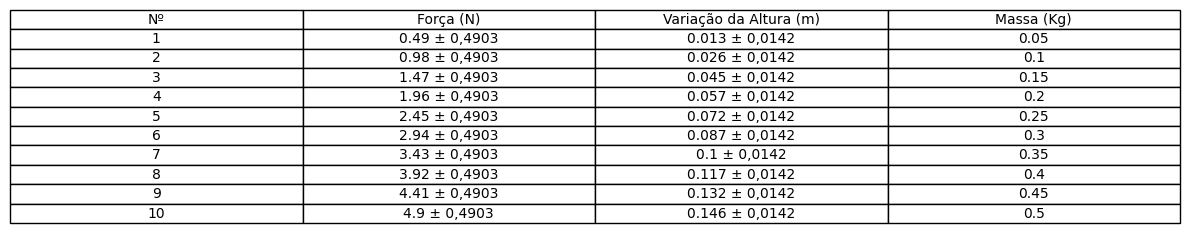

In [115]:
# Tabela Molas em Sequência

pesos_sequencia_com_incerteza = [f"{f} ± 0,4903" for f in pesos_sequencia]
deslocamentos_sequencia_com_incerteza = [f"{p} ± 0,0142" for p in deslocamentos_sequencia]

data = {
    "Nº": indexes_sequencia,
    "Força (N)": pesos_sequencia_com_incerteza,
    "Variação da Altura (m)": deslocamentos_sequencia_com_incerteza,
    "Massa (Kg)": massas_sequencia
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.tight_layout()
plt.show()

Erro quadrático médio: 0.003443923618622542
Intercepto em Y (B): 0.0361
Coeficiente (A): 33.3934
Equação aproximada para a reta: (33.3934)*y + 0.0361


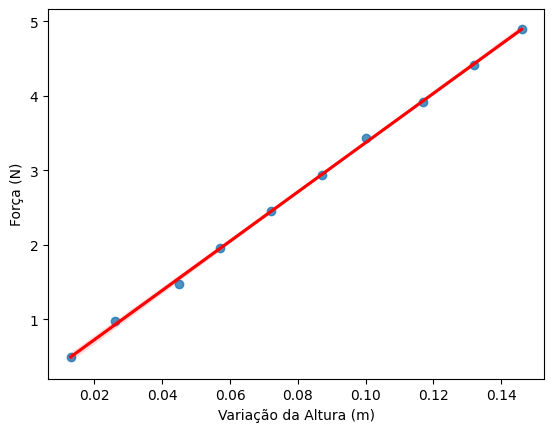

In [71]:
# Gráfico Molas em Sequência

forces_array = np.array(pesos_sequencia)
heights_array = np.array(deslocamentos_sequencia)
heights_array = np.array(heights_array).reshape(-1, 1)

heights_train, heights_test, forces_train, forces_test  = train_test_split(heights_array, forces_array, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(heights_train, forces_train)
forces_pred = model.predict(heights_test)
mse = mean_squared_error(forces_test, forces_pred)

coefficient = round(model.coef_[0], 4)
intercept = round(model.intercept_, 4)

print(f"Erro quadrático médio: {mse}")
print(f"Intercepto em Y (B): {intercept}")
print(f"Coeficiente (A): {coefficient}")
print(f"Equação aproximada para a reta: ({coefficient})*y + {intercept}")


sns.regplot(x = heights_array, y = forces_array, line_kws={'color': 'red'})
plt.xlabel('Variação da Altura (m)')
plt.ylabel('Força (N)')
plt.show()

## Resultados

In [95]:
print(f"Média constante elástica com mola única: {media_constantes_elasticas_unico} N/m\nMédia constante elástica com molas em série: {media_constantes_elasticas_serie} N/m\nMédia constante elástica com molas em sequência: {media_constantes_elasticas_sequencia} N/m")

Média constante elástica com mola única: 16.5065 N/m
Média constante elástica com molas em série: 8.613 N/m
Média constante elástica com molas em sequência: 34.5033 N/m
